In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

### 1. Dataset
Load the prostate dataset. 

In [82]:
#TODO
train = pd.read_csv("data/prostate_train.csv")
test = pd.read_csv("data/prostate_test.csv")

We will use the target $y=$lpsa throughout this exercise, and all other features as predictors $X$, so split the train and test sets by $X,y$.

In [83]:
#TODO
Xtrain, ytrain = train.drop('lpsa', axis=1), train['lpsa']
Xtest, ytest = test.drop('lpsa', axis=1), test['lpsa']

### 2. Ridge Regression
Perform Ridge regression with target lpsa and all other features as predictors. Do so for different regularization parameters $\lambda$.
Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.238, Fig. 6.4.

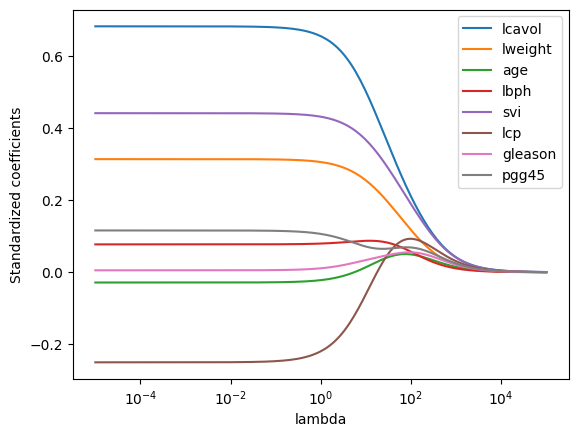

In [84]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
    
# This is an example of possible values for the lambda that you can consider.
lambdas = np.logspace(-5, 5, 200)

st_Xtrain = Xtrain
StandardScaler().fit_transform(st_Xtrain)

res = []
#TODO
for i in lambdas:
    rm = Ridge(alpha=i)
    rm.fit(st_Xtrain, ytrain)
    res.append(rm.coef_)

plt.xscale(value="log")
plt.xlabel("lambda")
plt.ylabel("Standardized coefficients")
for i, name in enumerate(st_Xtrain.columns):
    r = []
    for j in res:
        r.append(j[i])
    plt.plot(lambdas, r, label=name)
plt.legend()

### 3. Cross Validation & Ridge
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ for the ridge regression model.

In [85]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import statistics

# K-fold cross validation
folds = 10

#TODO
kf = KFold(n_splits=folds)
trainmse={}
testmse={}
for i in lambdas:
    testmse[i]=[]
    trainmse[i]=[]

for i, (itrain, itest) in enumerate(kf.split(st_Xtrain)):
    for l in lambdas:
        rm = Ridge(alpha=l)
        rm.fit(st_Xtrain.iloc[itrain], ytrain.iloc[itrain])
        testmse[l].append(mean_squared_error(ytrain.iloc[itest], rm.predict(st_Xtrain.iloc[itest])))
        trainmse[l].append(mean_squared_error(ytrain.iloc[itrain], rm.predict(st_Xtrain.iloc[itrain])))

final = {}
for k in testmse.keys():
    final[k] = statistics.mean(testmse[k])

final2 = {}
for k in testmse.keys():
    final2[k] = statistics.mean(trainmse[k])

Report train and test error measured in MSE for this $\lambda$.

In [86]:
i = min(final, key=final.get)
print("Best lambda in test is", i)
print("Lowest test MSE", final[i])
print("Lowest train MSE", final2[i])

Best lambda in test is 3.3700643292719317
Lowest test MSE 0.7557008236293986
Lowest train MSE 0.4660303041336638


### 4. Lasso Regression
Perform Lasso regression with target lpsa and all other features as predictors. Do so for different parameters $\lambda$.

Plot the resulting coefficients depending on $\lambda$, as in ISLR, p.242, Fig. 6.6.

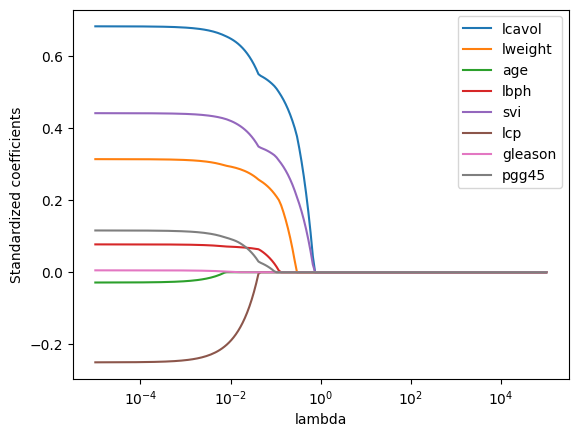

In [87]:
from sklearn.linear_model import Lasso

res=[]
for i in lambdas:
    rm = Lasso(alpha=i)
    rm.fit(st_Xtrain, ytrain)
    res.append(rm.coef_)

plt.xscale(value="log")
plt.xlabel("lambda")
plt.ylabel("Standardized coefficients")
for i, name in enumerate(st_Xtrain.columns):
    r = []
    for j in res:
        r.append(j[i])
    plt.plot(lambdas, r, label=name)
plt.legend()

## 5. Cross Validation & Lasso
Perform 10-fold cross-validation on the training set to determine the optimal value for $\lambda$ in the Lasso.
		Report train and test error measured in MSE for this $\lambda$. 

In [88]:
kf = KFold(n_splits=folds)
trainmse2={}
testmse2={}
for i in lambdas:
    testmse2[i]=[]
    trainmse2[i]=[]

for i, (itrain, itest) in enumerate(kf.split(st_Xtrain)):
    for l in lambdas:
        rm = Lasso(alpha=l)
        rm.fit(st_Xtrain.iloc[itrain], ytrain.iloc[itrain])
        testmse2[l].append(mean_squared_error(ytrain.iloc[itest], rm.predict(st_Xtrain.iloc[itest])))
        trainmse2[l].append(mean_squared_error(ytrain.iloc[itrain], rm.predict(st_Xtrain.iloc[itrain])))

final3 = {}
for k in testmse.keys():
    final3[k] = statistics.mean(testmse2[k])

final4 = {}
for k in testmse.keys():
    final4[k] = statistics.mean(trainmse2[k])


In [89]:
i2 = min(final3, key=final.get)
print("Best lambda in test is", i2)
print("Lowest test MSE", final3[i2])
print("Lowest train MSE", final4[i2])

Best lambda in test is 3.3700643292719317
Lowest test MSE 1.5041062315004239
Lowest train MSE 1.2941162327005695


In [90]:
print(st_Xtrain.columns)
rm = Lasso(alpha=i2)
rm.fit(st_Xtrain, ytrain)
print(rm.coef_)

rm2=Ridge(alpha=i)
rm2.fit(st_Xtrain, ytrain)
print(rm2.coef_)

Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45'], dtype='object')
[0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.51277754  0.25892654  0.0112004   0.08686741  0.37220617 -0.07215226
  0.03261035  0.07264891]


How many and which features are used?
Compare this to the coefficients determined for ridge regression in part 3 of this exercise.

We have used 6 out of 8 features.
'lcavol', 'lweight', 'lbph', 'svi', 'lcp' and 'pgg45' only were used
Whereas, in Ridge regression all 8 features were used
Non 0 coefficients in both methods are relatively close in value
except for 'lcp' where in Lasso it had double the value from its Ridge counterpart

## 6. 

Compare the performance, in terms of MSE, of the best models in parts 3. and 5. Which model would you choose and why? What alternative model could have been used?

In [93]:
print("Lasso MSE on test set", mean_squared_error(ytest, rm.predict(StandardScaler().fit_transform(Xtest))))
print("Ridge MSE on test set", mean_squared_error(ytest, rm2.predict(StandardScaler().fit_transform(Xtest))))

Lasso MSE on test set 1.354998385469582
Ridge MSE on test set 0.45520879892088595


/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


The MSE on test for the best lambda in both methods are ~1.35 and ~0.45 for Lasso and Ridge respectively.
Although they had similar performance in validation... Ridge outperformed on test data